In [1]:
import numpy as np
from circuit_knitting.cutting.cut_finding.LO_circuit_cut_optimizer.circuit_interface import SimpleGateList
from circuit_knitting.cutting.cut_finding.LO_circuit_cut_optimizer.lo_cuts_optimizer import LOCutsOptimizer
from circuit_knitting.cutting.cut_finding.LO_circuit_cut_optimizer.optimization_settings import OptimizationSettings
from circuit_knitting.cutting.cut_finding.LO_circuit_cut_optimizer.quantum_device_constraints import DeviceConstraints

## Best-First Test of CircuitCuttingOptimizer

In [2]:
circuit = [('cx', 0, 1), ('cx', 0, 2), ('cx', 1, 2),
           ('cx', 0, 3), ('cx', 1, 3), ('cx', 2, 3),
           
           ('cx', 4, 5), ('cx', 4, 6), ('cx', 5, 6),
           ('cx', 4, 7), ('cx', 5, 7), ('cx', 6, 7),
           
           
           ('cx', 3, 4), ('cx', 3, 5), ('cx', 3, 6), 
           
           
           ('cx', 0, 1), ('cx', 0, 2), ('cx', 1, 2),
           ('cx', 0, 3), ('cx', 1, 3), ('cx', 2, 3),
           
           ('cx', 4, 5), ('cx', 4, 6), ('cx', 5, 6),
           ('cx', 4, 7), ('cx', 5, 7), ('cx', 6, 7),
       ]

interface = SimpleGateList(circuit)

settings = OptimizationSettings(greedy_multiplier = None,
                                rand_seed         = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')

qubits_per_QPU=4
num_QPUs = 2




for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 2, -1):
        print(f'\n\n---------- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ----------')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)

        op = LOCutsOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print('Stats =', op.getStats(), 
              ', gamma =', None if (out is None) else out.upperBoundGamma(),
              ', min_reached =', op.minimumReached())
        if (out is not None):
           out.print(simple=True)
        else:
           print(out)
      
        print('Subcircuits:', interface.exportSubcircuitsAsString(name_mapping='default'),'\n')

        





---------- 4 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([ 511, 1649,  511,  153])} , gamma = 27.0 , min_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [12, ['cx', 3, 4]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [13, ['cx', 3, 5]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [14, ['cx', 3, 6]]}]
Subcircuits: AAAABBBB 



---------- 3 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([ 6486, 22989, 22989,  3288])} , gamma = 14348907.0 , min_reached = False
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [3, ['cx', 0, 3]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [4, ['cx', 1, 3]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [5, ['cx', 2, 3]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [9, ['cx', 4, 7]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [10, ['cx', 5, 7]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [11, ['cx', 6, 7]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [12, ['cx', 3, 4]]}, {'Cut

## Cut finding for efficient SU(2) Circuit with linear entanglement

### Visualize the circuit

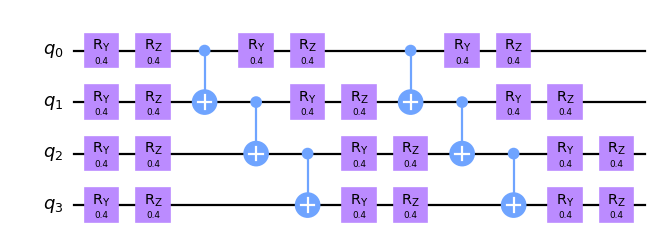

In [3]:
from qiskit.circuit.library import EfficientSU2
from circuit_knitting.cutting.cut_finding.LO_circuit_cut_optimizer.utils import QCtoCCOCircuit

qc = EfficientSU2(4, entanglement="linear", reps=2).decompose()
qc.assign_parameters([0.4] * len(qc.parameters), inplace=True)

circuit_ckt=QCtoCCOCircuit(qc)

qc.draw("mpl", scale=0.8)




### Perform cut finding

In [4]:
interface = SimpleGateList(circuit_ckt)

settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')


qubits_per_QPU=4
num_QPUs=2



for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n---------- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ----------')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)

        op = LOCutsOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print('Stats =', op.getStats(), 
              ', gamma =', None if (out is None) else out.upperBoundGamma(),
              ', min_reached =', op.minimumReached())
        if (out is not None):
            out.print(simple=True)
        else:
            print(out)
    
        print('Subcircuits:', interface.exportSubcircuitsAsString(name_mapping='default'),'\n')




---------- 4 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([ 7, 10,  7,  0])} , gamma = 1.0 , min_reached = True
[]
Subcircuits: AAAA 



---------- 3 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([30, 92, 30,  7])} , gamma = 9.0 , min_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [17, ['cx', 2, 3]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [25, ['cx', 2, 3]]}]
Subcircuits: AAAB 



---------- 2 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([15, 46, 15,  6])} , gamma = 9.0 , min_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [9, ['cx', 1, 2]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [20, ['cx', 1, 2]]}]
Subcircuits: AABB 



## Cut finding for 7 qubit circuit

### Visualize the circuit

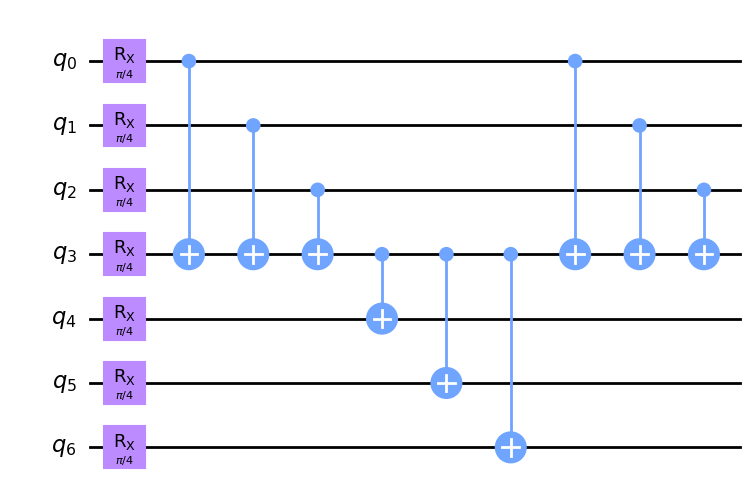

In [5]:
from qiskit import QuantumCircuit
qc_0 = QuantumCircuit(7)
for i in range(7):
    qc_0.rx(np.pi / 4, i)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)
qc_0.cx(3, 4)
qc_0.cx(3, 5)
qc_0.cx(3, 6)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)

qc_0.draw("mpl")

### Perform cut finding

In [6]:
circuit_ckt_wirecut=QCtoCCOCircuit(qc_0)

interface = SimpleGateList(circuit_ckt_wirecut)

settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')

qubits_per_QPU=7
num_QPUs=2



for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n---------- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ----------')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)

        op = LOCutsOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print('Stats =', op.getStats(), 
              ', gamma =', None if (out is None) else out.upperBoundGamma(),
              ', min_reached =', op.minimumReached())
        if (out is not None):
            out.print(simple=True)
        else:
            print(out)
        
        # print('\nAfter Cuts\n\nGate Positions:', interface.new_gate_ID_map)
        # for k, gate in enumerate(interface.new_circuit):
        #     print(k, gate, interface.cut_type[k])
        # print('Output Wires:', interface.output_wires,'\n')
        
        # print('Name Mapping = "default"')
        # for k, gate in enumerate(interface.exportCutCircuit(name_mapping='default')):
        #     print(k, gate, interface.cut_type[k])
        # print('Output Wire Mapping:', interface.exportOutputWires(name_mapping='default'))
        print('Subcircuits:', interface.exportSubcircuitsAsString(name_mapping='default'),'\n')



---------- 7 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([10, 16, 10,  0])} , gamma = 1.0 , min_reached = True
[]
Subcircuits: AAAAAAA 



---------- 6 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([ 39, 101,  39,   2])} , gamma = 3.0 , min_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [12, ['cx', 3, 6]]}]
Subcircuits: AAAAAAB 



---------- 5 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([101, 381, 101,  24])} , gamma = 9.0 , min_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [11, ['cx', 3, 5]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [12, ['cx', 3, 6]]}]
Subcircuits: AAAAABC 



---------- 4 Qubits per QPU, 2 QPUs ----------
Stats = {'CutOptimization': array([243, 945, 243, 101])} , gamma = 27.0 , min_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [10, ['cx', 3, 4]]}, {'Cut action': 'CutTwoQubitGate', 'Cut Gate': [11, ['cx', 3, 5]]}, {'Cut action': 'CutTwoQubitGa